In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,precision_score,confusion_matrix,mean_absolute_error,mean_squared_error
%matplotlib inline


In [23]:
import os
os.chdir("C:/Users/Hai/Desktop/insofe/Week8/20180728_Bach46_CSE7305c_Lab01_Clustering_Lab01 (1)")

In [24]:
cereal = pd.read_csv("Cereals.csv")
cereal.head()
cereal.columns
cereal.dtypes


name         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [16]:

#cereal['shelf'] = cereal['shelf'].astype("category")
#cereal['shelf'].value_counts()


3    36
2    21
1    20
Name: shelf, dtype: int64

In [25]:
cereal.head(5)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [26]:
numeric_vars = cereal.drop(['name','rating'],axis=1)

In [27]:
# Divide  data in to train and test
  
X_train, X_test= train_test_split(numeric_vars, test_size=0.150) 

In [28]:
print(X_train.shape)
print(X_test.shape)

(65, 12)
(12, 12)


In [30]:
numeric_vars.isnull().sum()

numeric_vars.dropna()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
dtype: int64

In [32]:
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy="mean")
mean_imputer.fit(numeric_vars)
imputed_numeric_vars = pd.DataFrame(mean_imputer.fit_transform(numeric_vars))

In [35]:
print(imputed_numeric_vars)

       0    1    2      3     4          5          6           7      8   \
0    70.0  4.0  1.0  130.0  10.0   5.000000   6.000000  280.000000   25.0   
1   120.0  3.0  5.0   15.0   2.0   8.000000   8.000000  135.000000    0.0   
2    70.0  4.0  1.0  260.0   9.0   7.000000   5.000000  320.000000   25.0   
3    50.0  4.0  0.0  140.0  14.0   8.000000   0.000000  330.000000   25.0   
4   110.0  2.0  2.0  200.0   1.0  14.000000   8.000000   98.666667   25.0   
5   110.0  2.0  2.0  180.0   1.5  10.500000  10.000000   70.000000   25.0   
6   110.0  2.0  0.0  125.0   1.0  11.000000  14.000000   30.000000   25.0   
7   130.0  3.0  2.0  210.0   2.0  18.000000   8.000000  100.000000   25.0   
8    90.0  2.0  1.0  200.0   4.0  15.000000   6.000000  125.000000   25.0   
9    90.0  3.0  0.0  210.0   5.0  13.000000   5.000000  190.000000   25.0   
10  120.0  1.0  2.0  220.0   0.0  12.000000  12.000000   35.000000   25.0   
11  110.0  6.0  2.0  290.0   2.0  17.000000   1.000000  105.000000   25.0   

In [37]:
# Divide  data in to train and test
  
X_train, X_test= train_test_split(imputed_numeric_vars, test_size=0.150) 

In [38]:
print(X_train.shape)
print(X_test.shape)

(65, 12)
(12, 12)


In [39]:
std = StandardScaler()
std.fit(X_train)
X_train_std= std.transform(X_train)
X_test_std= std.transform(X_test)

In [40]:
X_train_std[0:5,:]

array([[-0.92941621,  0.40389283, -0.99239533, -2.09681714,  0.30990636,
         1.24339512, -1.58114284,  0.24115009, -1.25640002, -1.523753  ,
        -0.26279598, -0.65439283],
       [ 0.1212282 , -1.4713239 , -0.99239533,  0.39710992, -0.48787239,
        -0.26492244,  0.96506691, -1.06203118, -0.1958026 , -1.523753  ,
        -0.26279598, -0.31512636],
       [ 0.64655041, -1.4713239 ,  1.98479065,  0.52180628, -0.88676177,
        -0.5163087 ,  0.50211969, -0.78767723, -0.1958026 , -0.31590001,
        -0.26279598, -0.31512636],
       [ 1.17187262,  0.40389283,  0.99239533,  0.02302087, -0.2884277 ,
        -0.39061557,  0.7335933 ,  0.24115009, -0.1958026 ,  0.89195298,
         1.48023858, -1.37533409],
       [-0.40409401,  1.3415012 ,  0.        , -2.09681714, -0.88676177,
         0.23785008, -0.886722  , -0.10179235, -0.1958026 , -0.31590001,
        -0.26279598,  0.74508137]])

In [41]:
X_train.index

Int64Index([65, 25, 12, 51, 43, 60, 64, 16,  3, 52, 53, 46, 32,  4, 63, 56, 10,
            62, 50, 47, 70, 35,  1,  7, 15,  9, 27, 42, 75, 22, 29, 13, 21, 74,
            20, 45,  5, 66, 37, 11, 40, 54, 38,  0, 28, 48, 58,  2, 76, 23, 61,
            39, 71, 72, 44, 24, 14, 67, 69,  6, 26, 19, 33, 59, 31],
           dtype='int64')

In [42]:
#Define hierarchical clustering
Hclustering = AgglomerativeClustering(n_clusters=2,affinity='cosine', linkage='complete')

In [43]:
## Fit on input data
Hclustering.fit(X_train_std)


AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=2,
            pooling_func=<function mean at 0x0000003A96845C80>)

In [44]:
Hclustering.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [45]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

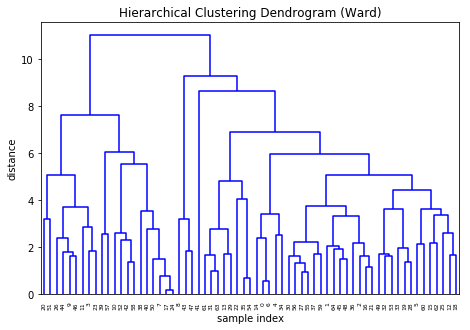

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_train_std, 'complete')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
#plt.tight_layout()
plt.show()

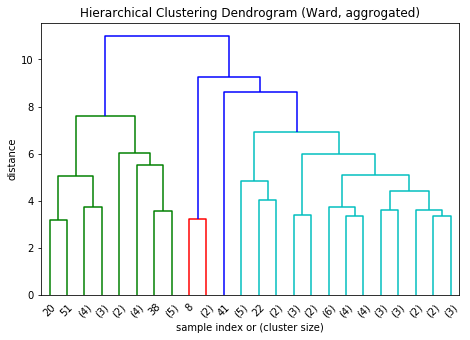

In [47]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    )
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [48]:
# Number of clusters
kmeans = KMeans(n_clusters=2,random_state=148461)
# Fitting the input data
kmeans = kmeans.fit(X_train_std)
# Getting the cluster labels
labels = kmeans.predict(X_train_std)
# Centroid values
centroids = kmeans.cluster_centers_

In [49]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=148461, tol=0.0001, verbose=0)

In [50]:
centroids

array([[-0.17197489, -0.31566707, -0.27694753,  0.0389704 , -0.42757516,
         0.28169652, -0.20845048, -0.5301248 , -0.02314721, -0.42825843,
        -0.37143162,  0.38214514],
       [ 0.33613274,  0.61698564,  0.54130654, -0.07616942,  0.83571509,
        -0.55058865,  0.40742593,  1.03615301,  0.04524227,  0.83705057,
         0.72597999, -0.74692005]])

In [51]:
labels

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [52]:
# Getting the cluster labels for the test Data set
labels_test = kmeans.predict(X_test_std)


In [53]:
labels_test

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [54]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_) #Total sum of squares for distance between each point and their corresponding cluster centroid

[[-0.17197489 -0.31566707 -0.27694753  0.0389704  -0.42757516  0.28169652
  -0.20845048 -0.5301248  -0.02314721 -0.42825843 -0.37143162  0.38214514]
 [ 0.33613274  0.61698564  0.54130654 -0.07616942  0.83571509 -0.55058865
   0.40742593  1.03615301  0.04524227  0.83705057  0.72597999 -0.74692005]]
619.6642560974842


In [55]:
wss= {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train_std)
    clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center


In [56]:
wss

{1: 780.0,
 2: 619.6642560974842,
 3: 530.6792859572705,
 4: 456.6739474239555,
 5: 386.420794359359,
 6: 332.8000379331932,
 7: 291.14118686536966,
 8: 257.09036882150167,
 9: 234.07695082681295}

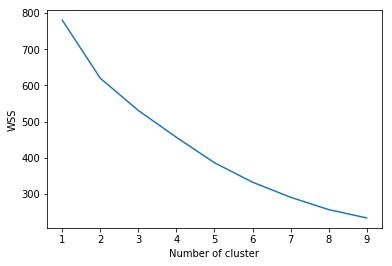

In [57]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.show()

In [58]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [59]:
X_train_std=pd.DataFrame(X_train_std)

In [60]:
X_train_std.shape

(65, 12)

In [61]:
indices=X_train_std.sample(frac=0.9,random_state=1234).index
print(indices)

Int64Index([22, 32, 33,  8,  6, 56, 40, 20,  4, 21, 50, 54, 29, 18, 45, 55, 36,
            13, 25, 58, 64, 10,  7, 27, 14, 17, 46, 31, 35,  1, 42, 63,  2, 39,
            48, 61,  0, 11,  3, 62, 34, 37, 60,  9, 16,  5, 28, 59, 44, 51, 43,
            30, 26, 41, 23, 49, 15, 57],
           dtype='int64')


In [62]:
Alpha=X_train_std.iloc[indices,:]

In [63]:
Alpha.shape

(58, 12)

In [64]:
kmeans = KMeans(n_clusters=2)
kmeans1 = kmeans.fit(X_train_std)
print(len(kmeans1.labels_))
X_train_std['clus']=kmeans1.labels_

65


In [65]:
kmeans = KMeans(n_clusters=2)
kmeans2=kmeans.fit(Alpha)
print(len(kmeans2.labels_))
Alpha['clus']=kmeans2.labels_

58


C:\Users\Hai\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [66]:
Alpha.shape

(58, 13)

In [67]:
g1=X_train_std.loc[indices,'clus']
g2=Alpha.clus

#x=pd.DataFrame()
#x.head(20)

In [68]:
adjusted_rand_score(g1,g2)

1.0